In [151]:
import math
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [152]:
import numpy as np
import matplotlib.pyplot as plt

""" Rotina que exibe o espectro de magnitude (X(ejw)) de um sinal discreto """
def espectro(y,name="default",Fs=1):

    #modulo da transf. de Fourier
    Y = np.abs(np.fft.fft(y))
    #frequencias avaliadas
    
    w = np.arange(Y.size)*Fs/Y.size
    # w = np.linspace(-Y.size/2,Y.size/2,Y.size)
    # print(w)

    #exibe o grafico do espectro
    plt.figure() 
    plt.plot(w,Y/np.max(Y))
    plt.xlabel('Hz', fontsize=15)
    # plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=15)
    plt.grid(True)
    # plt.xlim((0,2*math.pi))

    if name != "default":
        plt.savefig(f'{name}.png')
    
    return Y    

def espectro_xlim(y,name,xlim1,xlim2,Fs):

    #modulo da transf. de Fourier
    Y = np.abs(np.fft.fft(y))
    #frequencias avaliadas
    # w = np.linspace(0,2*math.pi,Y.size)
    w = np.arange(Y.size)*Fs/Y.size

    #exibe o grafico do espectro
    plt.figure() 
    plt.plot(w,Y/np.max(Y))
    plt.xlabel('Hz', fontsize=15)
    # plt.ylabel('|$Y(e^{j\Omega})$|', fontsize=15)
    plt.grid(True)
    plt.xlim((xlim1,xlim2))

    if name != "default":
        plt.savefig(f'{name}.png')
    
    return Y  

In [153]:
from scipy.io import wavfile

fs, som = wavfile.read('Grilo.wav')

ipd.Audio(som,rate=fs)

In [154]:
som[:7]

array([ 10,   9,  10,   5,   0,  -7, -13], dtype=int16)

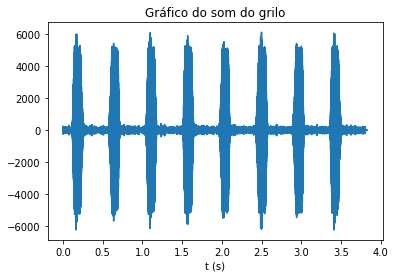

In [155]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');

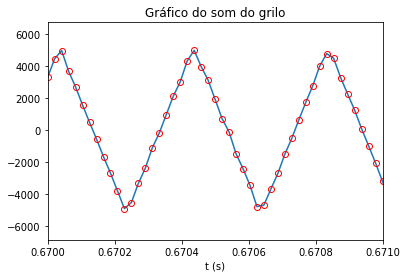

In [156]:
t = np.arange(som.size)/fs
plt.plot(t,som);
plt.plot(t,som,'ro',fillstyle = 'none')
plt.title('Gráfico do som do grilo')
plt.xlabel('t (s)');
plt.xlim((0.67,0.671));

Resposta 1: Frequencia máxima: 47999.74 Hz
Resposta 2: os valores de frequencia maiores que Fs serão zerados


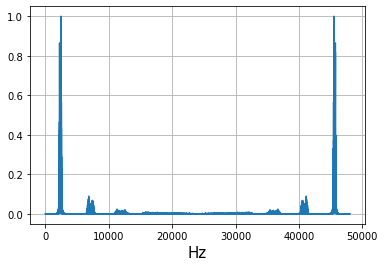

In [157]:
Y = espectro(som,"q3",Fs=fs)


print(f"Resposta 1: Frequencia máxima: {round(np.max(np.arange(Y.size)*fs/Y.size),2)} Hz")

print("Resposta 2: os valores de frequencia maiores que Fs serão zerados")

array([20245.        ,  1003.9697046 ,  1375.70075766, ...,
        1394.49349756,  1375.70075766,  1003.9697046 ])

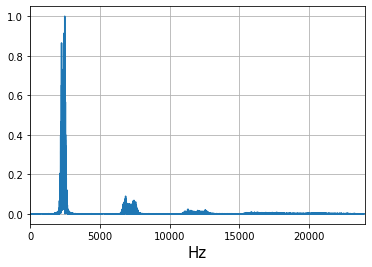

In [158]:
espectro_xlim(som,"q4",Fs= fs,xlim1=0,xlim2=fs/2)

In [159]:
som_subamostrado = som[::9]
ipd.Audio(som_subamostrado,rate=1/9*fs)

array([3345.        , 7260.25981321, 2544.41945668, ..., 3170.72212785,
       2544.41945668, 7260.25981321])

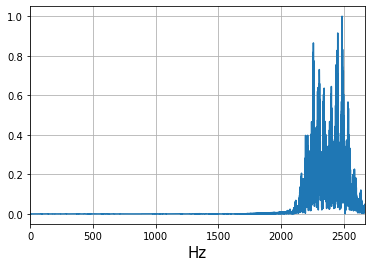

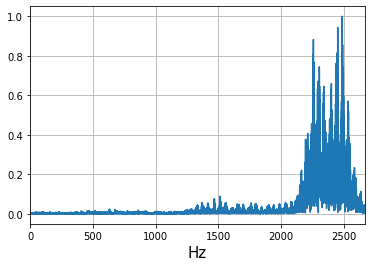

In [160]:
subfs = fs/9
espectro_xlim(som,"q7a",Fs= fs,xlim1=0,xlim2=subfs/2)
espectro_xlim(som_subamostrado,"q7b",xlim1=0,xlim2=subfs/2,Fs=subfs)

183779 48000


array([6.06907381e+09, 6.06768124e+09, 6.06353187e+09, ...,
       6.05670899e+09, 6.06353187e+09, 6.06768124e+09])

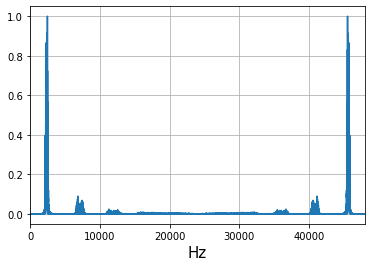

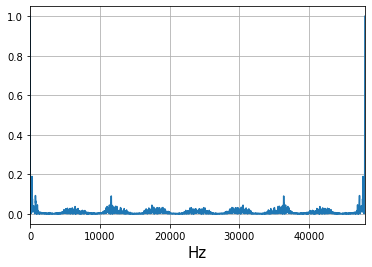

In [164]:

somY = espectro_xlim(som,"q8",Fs=fs,xlim1=0,xlim2=fs)
# f = Fs.k/N -> k = f.N/Fs
# f' = Fs/9
# f = f'/2 = Fs/18
# k = Fs.N/18.FS = N/18
# k2 = N/18 + N = 19N/18

print(N, Fs)

N = len(som)
Fs = fs

k1 = int(N/18)
k2 = int(19*N/18)
somY[k1:k2] = 0

espectro_xlim(somY,"q8",Fs=fs,xlim1=0,xlim2=fs)

